In [3]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec
from tqdm import tqdm
import ROOT
import math
'''
from utils import *
from utilsPCA import *
from plotting import *
from efficiency import *
from isolation import *
'''
import matplotlib as mpl

#mpl.rc('xtick', labelsize=16) 
#mpl.rc('ytick', labelsize=16) 
#mpl.rc('axes', labelsize=16, titlesize=20)
#mpl.rcParams["legend.title_fontsize"]=18

#plt.style.use(hep.style.CMS)
%matplotlib inline
lw=1.2

ROOT.enableJSVis()
    
import pickle

def eff_calculator(neff,ineff):
    k=neff
    n=ineff
    return math.sqrt((k+1)*(k+2)/((n+2)*(n+3))-(k+1)**2/((n+2)**2))


folders_1p9 = ["SinglePionTiming_1p9_100GeV", "SinglePionTiming_1p9_10GeV",
 "SinglePionTiming_1p9_15GeV", "SinglePionTiming_1p9_2GeV",
 "SinglePionTiming_1p9_30GeV", "SinglePionTiming_1p9_4GeV",
 "SinglePionTiming_1p9_50GeV", "SinglePionTiming_1p9_6GeV",
 "SinglePionTiming_1p9_8GeV"]


folders_2p2 = ["SinglePionTiming_2p2_100GeV", "SinglePionTiming_2p2_10GeV",
 "SinglePionTiming_2p2_15GeV", "SinglePionTiming_2p2_2GeV",
 "SinglePionTiming_2p2_30GeV", "SinglePionTiming_2p2_4GeV",
 "SinglePionTiming_2p2_50GeV", "SinglePionTiming_2p2_6GeV",
 "SinglePionTiming_2p2_8GeV"]



Welcome to JupyROOT 6.30/04


In [49]:


filename = "./Energy_Bins/SinglePionTiming_2p2_100GeV/histo/histo_14804_0.root"#output.root"
#filename = "./Energy_Bins/SinglePionTiming_1p9_2GeV/histo/histo_14802_0.root"#output.root"

file = uproot.open(filename)

file.keys()



['ticlDumper;1',
 'ticlDumper/trackstersCLUE3DHigh;1',
 'ticlDumper/trackstersTiclCandidate;1',
 'ticlDumper/simtrackstersSC;1',
 'ticlDumper/simtrackstersCP;1',
 'ticlDumper/simtracksters2HitsSC;1',
 'ticlDumper/simtracksters2HitsCP;1',
 'ticlDumper/trackstersSuperclusteringDNN;1',
 'ticlDumper/candidates;1',
 'ticlDumper/associations;1',
 'ticlDumper/tracks;1',
 'ticlDumper/simTICLCandidate;1']

In [37]:
f_associations = file["ticlDumper/associations;1"]
#f_associations = file["ticlDumper/simTICLCandidate;1"]
f_candidates=file["ticlDumper/candidates;1"]
f_simcandidates=file["ticlDumper/simTICLCandidate;1"]

f_simtrackstersSC=file["ticlDumper/simtrackstersSC;1"]
f_simtrackstersCP=file["ticlDumper/simtrackstersCP;1"]
f_trackstersTICL=file["ticlDumper/trackstersTiclCandidate;1"]
f_superclusters=file["ticlDumper/trackstersSuperclusteringDNN;1"]

In [38]:
print(f_trackstersTICL.keys())
print(len(f_trackstersTICL["regressed_energy"].array()[1]))

['event', 'event/run_', 'event/luminosityBlock_', 'event/event_', 'NTracksters', 'NClusters', 'time', 'timeError', 'regressed_energy', 'raw_energy', 'raw_em_energy', 'raw_pt', 'raw_em_pt', 'barycenter_x', 'barycenter_y', 'barycenter_z', 'barycenter_eta', 'barycenter_phi', 'EV1', 'EV2', 'EV3', 'eVector0_x', 'eVector0_y', 'eVector0_z', 'sigmaPCA1', 'sigmaPCA2', 'sigmaPCA3', 'id_probabilities', 'vertices_indexes', 'vertices_x', 'vertices_y', 'vertices_z', 'vertices_time', 'vertices_timeErr', 'vertices_energy', 'vertices_correctedEnergy', 'vertices_correctedEnergyUncertainty', 'vertices_multiplicity']
0


In [39]:
f_candidates.keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NCandidates',
 'candidate_charge',
 'candidate_pdgId',
 'candidate_id_probabilities',
 'candidate_time',
 'candidate_timeErr',
 'candidate_time_MTD',
 'candidate_time_MTD_err',
 'candidate_energy',
 'candidate_raw_energy',
 'candidate_px',
 'candidate_py',
 'candidate_pz',
 'track_in_candidate',
 'tracksters_in_candidate']

In [40]:
f_candidates.keys()
print(f_candidates["tracksters_in_candidate"].array()[3])

[[], [], [0], [], [1]]


In [41]:
f_simcandidates.keys()
print(f_simcandidates["simTICLCandidate_time"].array()[1])

[0.0462, 0.0462, 0.0462, 0.0462]


In [42]:
file["ticlDumper/simtrackstersSC;1"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'regressed_pt',
 'pdgID',
 'trackIdx',
 'trackTime',
 'timeBoundary',
 'boundaryX',
 'boundaryY',
 'boundaryZ',
 'boundaryEta',
 'boundaryPhi',
 'boundaryPx',
 'boundaryPy',
 'boundaryPz',
 'track_boundaryX',
 'track_boundaryY',
 'track_boundaryZ',
 'track_boundaryEta',
 'track_boundaryPhi',
 'track_boundaryPx',
 'track_boundaryPy',
 'track_boundaryPz',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [43]:
file["ticlDumper/simTICLCandidate;1"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'simTICLCandidate_raw_energy',
 'simTICLCandidate_regressed_energy',
 'simTICLCandidate_simTracksterCPIndex',
 'simTICLCandidate_boundaryX',
 'simTICLCandidate_boundaryY',
 'simTICLCandidate_boundaryZ',
 'simTICLCandidate_boundaryPx',
 'simTICLCandidate_boundaryPy',
 'simTICLCandidate_boundaryPz',
 'simTICLCandidate_time',
 'simTICLCandidate_caloParticleMass',
 'simTICLCandidate_pdgId',
 'simTICLCandidate_charge',
 'simTICLCandidate_track_in_candidate']

3
[[-211, 211, 211], [-211, 211, 211, -211, ... -211], [211, 211, -211, -211, 130]]


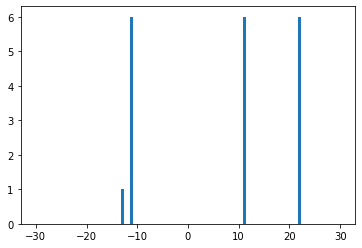

[[], [], []]


In [44]:
print(len(f_candidates["candidate_time"].array()[0]))
print(f_candidates["candidate_pdgId"].array())
plt.hist(np.ravel(f_candidates["candidate_pdgId"].array()),bins=100,range=[-30,30])
plt.show()

print(f_candidates["tracksters_in_candidate"].array()[0])

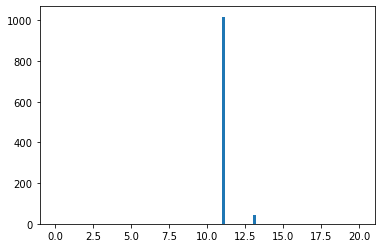

In [74]:
f_simtracksterSC = file["ticlDumper/simtrackstersSC;1"]
plt.hist(np.abs(np.ravel(f_simtracksterSC["pdgID"].array())),bins=100,range=[0,20])
plt.show()

In [14]:
print(f_associations.keys())
print(f_simtrackstersCP.keys())
#print(f_candidates.keys())
#print(f_trackstersTICL.keys())

['event', 'event/run_', 'event/luminosityBlock_', 'event/event_', 'tsCLUE3D_recoToSim_SC', 'tsCLUE3D_recoToSim_SC_score', 'tsCLUE3D_recoToSim_SC_sharedE', 'tsCLUE3D_simToReco_SC', 'tsCLUE3D_simToReco_SC_score', 'tsCLUE3D_simToReco_SC_sharedE', 'tsCLUE3D_recoToSim_CP', 'tsCLUE3D_recoToSim_CP_score', 'tsCLUE3D_recoToSim_CP_sharedE', 'tsCLUE3D_simToReco_CP', 'tsCLUE3D_simToReco_CP_score', 'tsCLUE3D_simToReco_CP_sharedE', 'ticlCandidate_recoToSim_SC', 'ticlCandidate_recoToSim_SC_score', 'ticlCandidate_recoToSim_SC_sharedE', 'ticlCandidate_simToReco_SC', 'ticlCandidate_simToReco_SC_score', 'ticlCandidate_simToReco_SC_sharedE', 'ticlCandidate_recoToSim_CP', 'ticlCandidate_recoToSim_CP_score', 'ticlCandidate_recoToSim_CP_sharedE', 'ticlCandidate_simToReco_CP', 'ticlCandidate_simToReco_CP_score', 'ticlCandidate_simToReco_CP_sharedE', 'tsCLUE3D_recoToSim_SC2Hits', 'tsCLUE3D_recoToSim_SC2Hits_score', 'tsCLUE3D_recoToSim_SC2Hits_sharedE', 'tsCLUE3D_simToReco_SC2Hits', 'tsCLUE3D_simToReco_SC2Hits_

In [15]:
#print(f_simtrackstersSC.keys())
print("SC:",len(f_simtrackstersSC["barycenter_z"].array()[0]))
print("CP:",len(f_simtrackstersCP["barycenter_z"].array()[0]))
print(f_associations["ticlCandidate_simToReco_CP"].array()[0])
print(f_associations["ticlCandidate_simToReco_CP_score"].array()[0])
print(f_associations["ticlCandidate_simToReco_CP_sharedE"].array()[0])


SC: 32
CP: 4
[[], [], [], [2], [5, 2], [2], [2, ... [12, 14, 13, 1], [10, 9, 8, 11, 0], [6, 3]]
[[], [], [], [1], [0.996, 0.032], ... [1, 1, 0.999, 0.702, 0.308], [0.999, 0.249]]
[[], [], [], [0.0243], [0.287, 8.85, ... [1.54, 2.23, 2.91, 59.6, 274], [3.89, 251]]


In [14]:
print(ak.max(f_associations["ticlCandidate_simToReco_CP"].array()[0]))
print(len(f_associations["ticlCandidate_simToReco_CP"].array()[0]))
assoc=f_associations["ticlCandidate_simToReco_CP"].array()
assoc_shE=f_associations["ticlCandidate_simToReco_CP_sharedE"].array()

trackster_energy=f_trackstersTICL["raw_energy"].array()#f_candidates["candidate_raw_energy"].array()
print(len(assoc[1]),len(candidate_energy[1]))

print(trackster_energy[0][6])
x=0
print(sum([len(y) for y in trackster_energy]))

counter=0
for i in tqdm(range(len(assoc))):
    for j in range(len(assoc[i])):
        for k in range(len(assoc[i][j])):
            #print(i,j,k)
            #if assoc[i][j][k]==3 and i==118:
            #    print("--" , trackster_energy[i][assoc[i][j][k]], "sh:",assoc_shE[i][j][k])
            if assoc_shE[i][j][k]>trackster_energy[i][assoc[i][j][k]]*0.5:
                if assoc_shE[i][j][k]/trackster_energy[i][assoc[i][j][k]]>1.001:
                    print("sus", i,j,k,assoc[i][j][k])
                #print("top")
                #print(assoc_shE[i][j][k],candidate_energy[i][assoc[i][j][k]])
                counter+=1
            #candidate_energy[i][j][assoc[i][j][k]]

print(counter)

14
32


NameError: name 'candidate_energy' is not defined

In [3]:
print("scores:",f_associations["ticlCandidate_simToReco_SC_score"].array()[0])
print("sharedE:",f_associations["ticlCandidate_simToReco_SC_sharedE"].array()[0])

NameError: name 'f_associations' is not defined

In [ ]:
print(f_associations["ticlCandidate_simToReco_SC"].array()[0])

In [ ]:
print(f_associations["ticlCandidate_simToReco_SC_score"].array()[0])

In [ ]:
print(f_associations["ticlCandidate_simToReco_SC_sharedE"].array()[0])

In [ ]:
f_trackstersTICL["vertices_x"].array()[0]


In [ ]:

fig = plt.figure()

# Aggiunta di un sistema di assi 3D
ax = fig.add_subplot(111, projection='3d')

# Visualizzazione dei punti
ax.scatter(f_trackstersTICL["vertices_x"].array()[0][0],f_trackstersTICL["vertices_y"].array()[0][0],f_trackstersTICL["vertices_z"].array()[0][0], c='r', marker='o')
ax.scatter(f_trackstersTICL["vertices_x"].array()[0][1],f_trackstersTICL["vertices_y"].array()[0][1],f_trackstersTICL["vertices_z"].array()[0][1], c='b', marker='o')
ax.scatter(f_trackstersTICL["vertices_x"].array()[0][2],f_trackstersTICL["vertices_y"].array()[0][2],f_trackstersTICL["vertices_z"].array()[0][2], c='g', marker='o')
ax.scatter(f_trackstersTICL["vertices_x"].array()[0][3],f_trackstersTICL["vertices_y"].array()[0][3],f_trackstersTICL["vertices_z"].array()[0][3], c='y', marker='o')

# Aggiunta di etichette per gli assi
ax.set_xlabel('Asse X')
ax.set_ylabel('Asse Y')
ax.set_zlabel('Asse Z')
plt.show()


In [68]:

def compute_residuals_energiesALL(file_name):
    
    open_file = uproot.open(file_name)
    f_simTICLCandidate = open_file["ticlDumper/simTICLCandidate;1"]
    f_simtrackstersCP = open_file["ticlDumper/simtrackstersCP;1"]
    f_simtrackstersSC = open_file["ticlDumper/simtrackstersSC;1"]
    f_candidates = open_file["ticlDumper/candidates;1"]
    f_trackstersTICL=open_file["ticlDumper/trackstersTiclCandidate;1"]
    f_associations = open_file["ticlDumper/associations;1"]
    
    candidate_time = f_candidates["candidate_time"].array()
    candidate_timeErr= f_candidates["candidate_timeErr"].array()
    
    candidate_time_MTD = f_candidates["candidate_time_MTD"].array()
    candidate_time_MTDErr= f_candidates["candidate_time_MTD_err"].array()
    
    candidate_energy= f_candidates["candidate_energy"].array()
    candidate_px= f_candidates["candidate_px"].array()
    candidate_py= f_candidates["candidate_py"].array()
    trackster_energy=f_trackstersTICL["raw_energy"].array()#f_candidates["candidate_raw_energy"].array()
    
    tracksterCP_energy = f_simtrackstersCP["raw_energy"].array()
    tracksterSC_energy = f_simtrackstersSC["raw_energy"].array()
    tracksterSC_trackID = f_simtrackstersSC["trackIdx"].array()
    tracksterSC_pdgID = f_simtrackstersSC["pdgID"].array()
    tracksterSC_eta=f_simtrackstersSC["barycenter_eta"].array()
    tracksterSC_phi=f_simtrackstersSC["barycenter_phi"].array()
    candidate_track = f_candidates["track_in_candidate"].array()
    candidate_pdgID = f_candidates["candidate_pdgId"].array()
    
    print(f_associations["ticlCandidate_simToReco_CP"].array()[0])
    print(len(f_associations["ticlCandidate_simToReco_CP"].array()[0]))
    assoc=f_associations["ticlCandidate_simToReco_CP"].array()
    assoc_shE=f_associations["ticlCandidate_simToReco_CP_sharedE"].array()

    #print(len(assoc[1]),len(candidate_energy[1]))

    #print(candidate_energy[0][6])
    x=0
    #print(sum([len(y) for y in candidate_energy]))
    ncandidates=sum([len(y) for y in candidate_energy])
    counter=0
    listvalid=[]
    list_track=[]
    list_pdgID=[]
    ticl_w_tracksters=0
    ticl_w_true_trackster=0
    ticl_w_true_track=0
    ticl_wo_true_track=0
    ticl_w_true_pid=0
    ticl_wo_true_pid=0
    sc_w_ticl=0
    list_sc_sametrackster=[]
    for i in tqdm(range(len(assoc))):
        if (len(assoc_shE[i])!= len(tracksterSC_energy[i])):
            print("len",len(assoc_shE[i]), len(tracksterSC_energy[i]))
        listvalid.append([])
        list_track.append([])
        list_pdgID.append([])
        list_sc_sametrackster.append([])
        for j in range(len(assoc[i])):
            for k in range(len(assoc[i][j])):
                testvar=False
                #print(i,j,k)
                #if assoc[i][j][k]==3 and i==118:
                #    print("--" , trackster_energy[i][assoc[i][j][k]], "sh:",assoc_shE[i][j][k])
                
                if assoc_shE[i][j][k]>tracksterSC_energy[i][j]*0.5:#trackster_energy[i][assoc[i][j][k]]*0.5:
                    sc_w_ticl+=1
                    if (i==10 and assoc[i][j][k]==2):
                        print(tracksterSC_eta[i][j],tracksterSC_phi[i][j],tracksterSC_energy[i][j],assoc_shE[i][j][k])
                        print(trackster_energy[i][assoc[i][j][k]])
                    listvalid[i].append(assoc[i][j][k])
                    list_track[i].append(tracksterSC_trackID[i][j])
                    list_pdgID[i].append(tracksterSC_pdgID[i][j])
                    #tracksterSC_energy[i][j]
                    if assoc_shE[i][j][k]/tracksterSC_energy[i][j]>1.001:
                        print("sus", i,j,k,assoc[i][j][k])
                    if testvar==True:
                        print("ATTENZIONE")
                    testvar==True
                    
                    #print("top")
                    #print(assoc_shE[i][j][k],candidate_energy[i][assoc[i][j][k]])
                    counter+=1
                #candidate_energy[i][j][assoc[i][j][k]]
    #print(list_track)
    print("efficient:", counter,"inefficient linking or trackless:", ncandidates-counter,"efficiency:",counter/ncandidates)
    print("trackless candidates:")
    
    #print("")
    from collections import Counter
    
    for j in range(len(listvalid)):
        print(j,len(assoc[j]),Counter(listvalid[j]))
    
    
    tracksters_in_candidate=f_candidates["tracksters_in_candidate"].array()
    
    
    simcandidate_time = f_simTICLCandidate["simTICLCandidate_time"].array()
    simcandidate_charge=f_simTICLCandidate["simTICLCandidate_charge"].array()
    
    candidate_charge=f_candidates["candidate_charge"].array()
    
    ticl_residuals={"avg":[],
                    "hgcal":[],
                    "mtd":[]}
    ticl_energies={"avg":[],
                    "hgcal":[],
                    "mtd":[]}
    ticl_pt={"avg":[],
             "hgcal":[],
             "mtd":[]}
    
    ticl_isCharged={"avg":[],
                    "hgcal":[],
                    "mtd":[]}
    trackless=0
    for i in tqdm(range(int(len(simcandidate_time)))):
        #if ak.max(assoc[i])>len(candidate_time[i]):
        #if len(candidate_time[i])>len(trackster_energy[i]):
        #        print(i, len(candidate_time[i]),len(candidate_energy[i]),len(trackster_energy[i]),ak.max(assoc[i]))
        #        print(trackster_energy[i])
        for j in range(len(candidate_time[i])):
            if (len(tracksters_in_candidate[i][j])>1):
                print("ATTENZIONE")
            t_MTD=False
            t_HGCal=False
            time_avg=0
            time_avgErr=0
            trck_in_cand=tracksters_in_candidate[i][j]
            if (len(trck_in_cand)>0):
                if(len(trck_in_cand)>1): 
                    print("---- Warning: more than 1 trackster in candidate")
                ticl_w_tracksters+=1
                if i==10 and trck_in_cand[0]==2:
                    print(candidate_energy[i][j])
                if trck_in_cand[0] in listvalid[i]:
                    ticl_w_true_trackster+=1
                    idx=listvalid[i].index(trck_in_cand[0])
                    
                    if (list_track[i][idx]== candidate_track[i][j]):
                        ticl_w_true_track+=1
                    else:
                        ticl_wo_true_track+=1
                    
                    
                    if (abs(list_pdgID[i][idx])<23):
                        sim_isLepton=True
                    else:
                        sim_isLepton=False
                        
                    if (list_track[i][idx]>=0):
                        sim_isCharged=True
                    else:
                        sim_isCharged=True
                        
                        
                    if (abs(candidate_pdgID[i][j])<23):
                        cand_isLepton=True
                    else:
                        cand_isLepton=False
                        
                    if (candidate_track[i][j]>=0):
                        cand_isCharged=True
                    else:
                        cand_isCharged=True
                        
                        
                    
                    if (cand_isLepton == sim_isLepton and cand_isCharged==sim_isCharged):
                        ticl_w_true_pid+=1
                    else:
                        ticl_wo_true_pid+=1
                        
                    
                    if (candidate_timeErr[i][j]>0):
                        t_HGCal=True 
                        ticl_residuals["hgcal"].append(simcandidate_time[i][0]-candidate_time[i][j])
                        ticl_energies["hgcal"].append(candidate_energy[i][j])
                        ticl_pt["hgcal"].append(math.sqrt(candidate_px[i][j]**2+candidate_py[i][j]**2))
                        ticl_isCharged["hgcal"].append(not candidate_charge[i][j]==0)
                        time_avg=candidate_time[i][j]
                        time_avgErr=candidate_timeErr[i][j]

                    if(candidate_time_MTDErr[i][j]>0):
                        t_MTD=True
                        MTD_time=candidate_time_MTD[i][j]
                        ticl_residuals["mtd"].append(simcandidate_time[i][0]-MTD_time)
                        ticl_energies["mtd"].append(candidate_energy[i][j])
                        ticl_pt["mtd"].append(math.sqrt(candidate_px[i][j]**2+candidate_py[i][j]**2))
                        ticl_isCharged["mtd"].append(not candidate_charge[i][j]==0)
                        if(t_HGCal):
                            inv_hgcal_err=1./(time_avgErr**2)
                            inv_mtd_err=1./(candidate_time_MTDErr[i][j]**2)
                            time_avg=(candidate_time[i][j]*inv_hgcal_err+MTD_time*inv_mtd_err)/(inv_mtd_err+inv_hgcal_err)

                        else:
                            time_avg=MTD_time

                    if(t_MTD or t_HGCal):
                        ticl_residuals["avg"].append(simcandidate_time[i][0]-time_avg)
                        ticl_energies["avg"].append(candidate_energy[i][j])
                        ticl_pt["avg"].append(math.sqrt(candidate_px[i][j]**2+candidate_py[i][j]**2))
                        ticl_isCharged["avg"].append(not candidate_charge[i][j]==0)
            else:
                trackless+=1
            
            eff_track=(ncandidates-trackless)/ncandidates
            eff_link = counter/(ncandidates-trackless)
    
    print(ticl_w_tracksters,sc_w_ticl,ticl_w_true_trackster,ticl_w_true_track+ticl_wo_true_track,
    ticl_w_true_pid+ticl_wo_true_pid)
    print("more than one SC for candidate: ",sc_w_ticl - ticl_w_true_trackster, "fraction: ", (sc_w_ticl - ticl_w_true_trackster)/ticl_w_tracksters )
    return ticl_residuals, ticl_energies, ticl_pt, ticl_isCharged,ticl_w_true_trackster,ticl_w_true_track,ticl_w_true_pid,ticl_w_tracksters

In [69]:
compute_residuals_energiesALL(filename)

[[], [], [], [2], [5, 2], [2], [2, ... [12, 14, 13, 1], [10, 9, 8, 11, 0], [6, 3]]
32


  7%|▋         | 14/200 [00:00<00:06, 30.15it/s]

-2.207806348800659 -1.034530758857727 13.795536994934082 13.281525611877441
256.2598571777344
-2.1947877407073975 -1.02725350856781 0.01570938341319561 0.01570938341319561
256.2598571777344
-2.1847095489501953 -1.0289798974990845 0.8657606840133667 0.6759589314460754
256.2598571777344
-2.215669870376587 -1.043127179145813 9.926347732543945 9.430159568786621
256.2598571777344
-2.2962145805358887 -1.1393401622772217 127.40991973876953 65.83404541015625
256.2598571777344
-2.2193808555603027 -1.0498764514923096 90.08975219726562 79.80984497070312
256.2598571777344
-2.238333225250244 -1.172594666481018 148.04298400878906 75.73310852050781
256.2598571777344


100%|██████████| 200/200 [00:07<00:00, 27.33it/s]


efficient: 2887 inefficient linking or trackless: 2050 efficiency: 0.5847680777800284
trackless candidates:
0 32 Counter({2: 10, 4: 2, 1: 1, 0: 1, 3: 1})
1 48 Counter({10: 4, 9: 2, 0: 2, 12: 1})
2 32 Counter({15: 10, 14: 1, 0: 1, 2: 1, 1: 1})
3 124 Counter({15: 4, 21: 3, 8: 2, 20: 2, 26: 2, 3: 2, 16: 2, 29: 2, 19: 1, 1: 1, 17: 1, 14: 1, 18: 1, 27: 1, 23: 1, 12: 1, 28: 1, 30: 1, 25: 1, 22: 1, 5: 1, 6: 1, 4: 1, 10: 1, 7: 1})
4 4 Counter({4: 1, 1: 1, 0: 1, 2: 1})
5 32 Counter({0: 15, 1: 1, 3: 1, 2: 1})
6 4 Counter({13: 1, 2: 1, 0: 1, 1: 1})
7 4 Counter({0: 1, 2: 1, 1: 1, 3: 1})
8 4 Counter({3: 1, 0: 1, 1: 1})
9 48 Counter({3: 14, 2: 1, 9: 1, 8: 1, 1: 1, 0: 1})
10 20 Counter({2: 7, 1: 1, 3: 1, 16: 1, 14: 1, 0: 1})
11 22 Counter({7: 7, 1: 2, 3: 1})
12 29 Counter({1: 11, 3: 1, 0: 1, 2: 1})
13 30 Counter({10: 14, 9: 1, 1: 1, 0: 1, 2: 1})
14 109 Counter({14: 9, 3: 6, 16: 6, 12: 2, 6: 1, 7: 1, 11: 1, 13: 1, 1: 1})
15 49 Counter({13: 10, 17: 5, 14: 2, 15: 1, 16: 1, 2: 1, 1: 1})
16 92 Counter({2:

 10%|█         | 20/200 [00:00<00:03, 45.85it/s]

229.94900512695312


100%|██████████| 200/200 [00:04<00:00, 48.56it/s]


4707 2887 1237 1237 1237
more than one SC for candidate:  1650 fraction:  0.3505417463352454


({'avg': [0.0040579151904440725,
   0.012192825579937505,
   -0.004191339015960693,
   0.005641032945348123,
   0.012904912233352661,
   0.03188017010688782,
   0.025556355714797974,
   -0.0031391888088146136,
   -0.004598703354807193,
   -0.028955664372798562,
   -0.029918640851974487,
   -0.13389138877391815,
   0.05513288731335172,
   -0.05609877570184606,
   0.10113462455329089,
   -0.09090070137503439,
   -0.003197471371924894,
   0.026013404483903022,
   0.005419589495044494,
   -0.09525421261787415,
   -0.10436275601387024,
   -0.1353447586297989,
   -0.1367981731891632,
   -0.1411307156085968,
   -0.14307525753974915,
   -0.21245315670967102,
   -0.16073349118232727,
   -0.10936382412910461,
   -0.13503386080265045,
   -0.09774711728096008,
   -0.010234721917739387,
   -0.006328932001284648,
   -0.0277473574955317,
   0.1844191811978817,
   0.0017905650844860233,
   -0.0029492519874098344,
   -0.012278851917069983,
   -0.013019714636326535,
   0.006162419229916449,
   0.0115029

In [ ]:

t_res_all, energies_all, pt_all, isCharged_all=compute_residuals_energiesALL(filename)

In [78]:
def pdf(x, par):
    A, mean, sigmaL, alphaL, sigmaR, alphaR = par

    x = np.asarray(x)
    if x.ndim == 0:
        x = np.array([x])

    answer = np.zeros(x.shape)

    left = x < mean
    right = np.logical_not(left)

    top = np.square(x - mean)

    bottomL = 2 * (sigmaL * sigmaL + alphaL * top[left])
    bottomR = 2 * (sigmaR * sigmaR + alphaR * top[right])

    answer[left] = A * np.exp(-np.divide(top[left], bottomL))
    answer[right] = A * np.exp(-np.divide(top[right], bottomR))
    return answer


def cruijff(x, params):
    A = params[0]
    m = params[1]
    sigma_left = params[2]
    sigma_right = params[3]
    alpha_left = params[4]
    alpha_right = params[5]
    
    t = (x[0] - m) 
    if t < 0:
        t = (x[0] - m)/sigma_left 
        return A*math.exp(-0.5 * t * t / (1 + 0.5*alpha_left * t * t))
    else:
        t = (x[0] - m)/sigma_right
        return A*math.exp(-0.5 * t * t / (1 + 0.5*alpha_right * t * t))
    
    

In [ ]:
#t_res_avg,energies_avg,pt_avg,isCharged_avg=compute_residuals_energies(filename)
#t_res_mtd,energies_mtd,pt_mtd,isCharged_mtd =compute_residuals_energies_MTD(fn_resolved)
#t_res_mtd_trckonly,energies_mtd_trckonly,pt_mtd_trckonly,isCharged_mtd_trckonly =compute_residuals_energies_MTD_trackonly(fn_resolved)
t_res_hgcal=t_res_all["hgcal"]
isCharged_hgcal=isCharged_all["hgcal"]
print(len(t_res_hgcal))
#print(isCharged_hgcal)
#print(len(t_res_hgcal1))


nbins=100


plt.title("Residuals")
plt.hist(t_res_hgcal,bins=nbins, histtype="step",label="HGCal time",log=False, range=[-0.5,0.5],linewidth=lw)
#plt.hist(energies_hgcal,bins=nbins,histtype="step",label="HGCal time",log=True, range=[0,60],linewidth=lw)
#plt.hist(energies_avg,bins=nbins,histtype="step",label="Averaged",log=True, range=[0,60],linewidth=lw)

plt.legend()
plt.xlabel("Residuals [ns]")
plt.ylabel("Counts")
plt.show()


plt.title("Residuals of charged candidates")
plt.hist(np.array(t_res_hgcal)[np.array(isCharged_hgcal)],bins=nbins, histtype="step",label="HGCal time",log=False, range=[-0.1,0.1],linewidth=lw)
#plt.hist(energies_hgcal,bins=nbins,histtype="step",label="HGCal time",log=True, range=[0,60],linewidth=lw)
#plt.hist(energies_avg,bins=nbins,histtype="step",label="Averaged",log=True, range=[0,60],linewidth=lw)

plt.legend()
plt.xlabel("Residuals [ns]")
plt.ylabel("Counts")

print(np.quantile(np.array(t_res_hgcal)[np.array(isCharged_hgcal)],q=[0.25,0.75]))
#print()

h1=ROOT.TH1F("h1","Residuals of charged candidates;Res [ns];Counts",nbins,-0.1,0.1)
h1.Sumw2()
f_gaus=ROOT.TF1("f1","gaus(0)",-10.,10.)
f_cruijff=ROOT.TF1("f2",cruijff,-10,10.,6)

for i in range(len(t_res_hgcal)):
    if isCharged_hgcal[i]:
        h1.Fill(t_res_hgcal[i])

ROOT.gStyle.SetOptFit(True)
c1=ROOT.TCanvas()
c1.cd()
h1.Draw("E")
f_cruijff.SetParNames("A","#mu","#sigma_L","#sigma_R","#alpha_L","#alpha_R")
f_cruijff.SetParameters(3000,0.0019,0.0173,0.0173,0,0)
#f_cruijff.FixParameter(4,0)
#f_cruijff.FixParameter(5,0)

fitresult=h1.Fit(f_gaus,"S","",-0.03,0.030)
print(fitresult)
print("cov:",fitresult.GetCovarianceMatrix()[0][0])
c1.Draw()

c2=ROOT.TCanvas()
c2.cd()
h1.Draw("E")


#fitresult=h1.Fit(f_cruijff,"S","",-0.05,0.05)
c2.Draw()

# Selections 1p9 >

In [ ]:
dict_data={}


for i in range(len(folders_1p9)):
    file_name="./Energy_Bins/"+folders_1p9[i]+"/output.root"
    dict_data[folders_1p9[i]]=compute_residuals_energiesALL(file_name)
    
    

with open('data_assoc/1p9.pickle', 'wb') as handle:
    pickle.dump(dict_data, handle, protocol=pickle.HIGHEST_PROTOCOL)




[[12, 1], [2], [9, 11, 10, 0], [6, 8, 5, 7, 4, 3]]
4


  2%|▏         | 141/9400 [00:02<02:11, 70.61it/s]

In [24]:
dict_data["SinglePionTiming_1p9_8GeV"]

({'avg': [0.016175428041008966,
   0.016093160268764672,
   -0.004555998426981012,
   0.012617539226874697,
   -0.011943448031833337,
   -0.024203182947365398,
   -0.0023450255393981934,
   -0.05187505483627319,
   -0.025253236293792725,
   0.011806725689765984,
   0.018606964473177723,
   0.020189122774293522,
   -0.011914824748202602,
   0.004706427454948425,
   -0.04376426433739468,
   -0.0064325731507282186,
   -0.01831820295410197,
   -0.1861710548400879,
   -0.21960017085075378,
   -0.00865540581737001,
   -0.032327156020459435,
   -0.005181587333787957,
   0.09451740980148315,
   0.06436508893966675,
   -0.018940771932306366,
   0.005763519061916522,
   -0.039958769974406505,
   0.02846890370968075,
   0.003907884533352557,
   -0.032829002533910634,
   -0.01910386015991189,
   -0.05591657757759094,
   -0.006388135254383087,
   0.003359287497934599,
   0.0017880782736644646,
   0.2819400355219841,
   -0.007947300724044079,
   0.00229736792226673,
   0.10165900737047195,
   0.1527

# Selections 2p2 

In [ ]:


for i in range(len(folders_2p2)):
    file_name="./Energy_Bins/"+folders_2p2[i]+"/output.root"
    dict_data[folders_2p2[i]]=compute_residuals_energiesALL(file_name)


with open('data_assoc/2p2.pickle', 'wb') as handle:
    pickle.dump(dict_data, handle, protocol=pickle.HIGHEST_PROTOCOL)



    

# Funz per fittare

# Load selected data >

In [4]:
file = open('data_assoc/2p2.pickle', 'rb')
dict_data = pickle.load(file)
file.close()


In [5]:


from multiprocessing import Process, Queue

import re


def resolution(folder,tag,dict_resolutions,Q):
    
    
    t_res_all, energies_all, pt_all, isCharged_all,eff_link,eff_track=dict_data[folder]
   
    nbins=100
    


    histo={"avg":ROOT.TH1F("combined","Res Combination;Res [ns];Counts",nbins,-0.1,0.1),
          "hgcal":ROOT.TH1F("hgcal","Res HGCal;Res [ns];Counts",nbins,-0.1,0.1),
          "mtd":ROOT.TH1F("mtd","Res MTD;Res [ns];Counts",nbins,-0.1,0.1)}
    
    #f_gaus=ROOT.TF1("f1","gaus(0)",-10.,10.)
    f_cruijff=ROOT.TF1("f2",cruijff,-10,10.,6)

    for key in t_res_all:
        for i in range(len(t_res_all[key])):
            if isCharged_all[key][i]:
                histo[key].Fill(t_res_all[key][i])



    ROOT.gStyle.SetOptFit(True)

    #mg=ROOT.TMultiGraph()

    c1=ROOT.TCanvas()
    c1.cd()
    histo["avg"].SetLineColor(ROOT.kMagenta+2)

    histo["hgcal"].SetLineColor(ROOT.kCyan+2)


    histo["mtd"].SetLineColor(ROOT.kSpring+4)

    [histo[key].SetLineWidth(2) for key in histo]
    [histo[key].Sumw2() for key in histo]
    [histo[key].Draw("SAME E") for key in histo]
    
    c1.BuildLegend()
    
    f_cruijff.SetParNames("A","#mu","#sigma_L","#sigma_R","#alpha_L","#alpha_R")
    f_cruijff.SetParameters(3000,0.0019,0.0173,0.0173,0,0)
    f_cruijff.SetParLimits(2,0.01,10)
    f_cruijff.SetParLimits(3,0.01,10)
    f_cruijff.SetParLimits(4,0.00001,10)
    f_cruijff.SetParLimits(5,0.00001,10)
    
    match = re.search(r'(\d+)GeV', folder)
    
    
    
    
    
    resolutions={}
    resolution_errs={}
    
    for key in t_res_all:
        if(int(match.group(1))==2):
            print(2)
            f_cruijff.SetParameters(200,-0.0007,0.0224223,0.0224223,0.01,0.01)
            f_cruijff.FixParameter(4,0.0001)
            f_cruijff.FixParameter(5,0.0001)
            fitresult=histo[key].Fit(f_cruijff,"LN","",-0.03,0.03)
            f_cruijff.SetParLimits(2,0.01,10)
            f_cruijff.SetParLimits(3,0.01,10)
            f_cruijff.ReleaseParameter(4)
            f_cruijff.ReleaseParameter(5)
            #f_cruijff.FixParameter(4,0.0001)
            #f_cruijff.FixParameter(5,0.0001)
        if(int(match.group(1))==4):
            print(2)
            f_cruijff.SetParameters(200,-0.0007,0.0224223,0.0224223,0.01,0.01)
            f_cruijff.FixParameter(4,0.0001)
            f_cruijff.FixParameter(5,0.0001)
            fitresult=histo[key].Fit(f_cruijff,"LN","",-0.03,0.03)
            f_cruijff.SetParLimits(2,0.01,10)
            f_cruijff.SetParLimits(3,0.01,10)
            f_cruijff.ReleaseParameter(4)
            f_cruijff.ReleaseParameter(5)
            #f_cruijff.FixParameter(4,0.0001)
            #f_cruijff.FixParameter(5,0.0001)
        
        print(folder)
        f_cruijff.ReleaseParameter(4)
        f_cruijff.ReleaseParameter(5)
        fitresult=histo[key].Fit(f_cruijff,"MLS+","SAME",-0.1,0.1)
        cov_matrix=fitresult.GetCovarianceMatrix()
        params=f_cruijff.GetParameters()
        sigma_c=(params[2]+params[3])/2

        resolutions[key]=sigma_c
        resolution_errs[key]=math.sqrt(0.25*(cov_matrix[2][2]+cov_matrix[3][3])+ 0.5*cov_matrix[2][3])
    
    match = re.search(r'(\d+)GeV', folder)
    
    dict_resolutions[int(match.group(1))]=[resolutions,resolution_errs]
    Q.put(dict_resolutions)
    if "1p9" in folder:
        c1.SaveAs("PlotAssoc/H"+str(tag)+".pdf")
        
    if "2p2" in folder:
        c1.SaveAs("PlotAssoc/H"+str(tag)+".pdf")
        
    c1.SaveAs("H"+str(tag)+".pdf")
    

# Fit for 1.9

In [30]:
procs=[]

q=Queue()
dict_resolutions={}
res={}
    
numeri_GeV=[]
for folder in folders_1p9:
    match = re.search(r'(\d+)GeV', folder)
    if match:
        numeri_GeV.append(int(match.group(1)))
    p=Process(target=resolution,args=(folder,folder,dict_resolutions,q))
    procs.append(p)
    p.start()
    p.join()
    #t_resolution,t_resolution_err=resolution(folder,folder,dict_resolutions)



    

    
for job in procs:
    job.join()

for i in range(len(folders_1p9)):
    dict_resolutions.update(q.get())
    
print(dict_resolutions)

    
    
import pickle


with open('data_assoc/res1p9.pickle', 'wb') as handle:
    pickle.dump(dict_resolutions, handle, protocol=pickle.HIGHEST_PROTOCOL)



SinglePionTiming_1p9_100GeV
SinglePionTiming_1p9_100GeV
SinglePionTiming_1p9_100GeV
SinglePionTiming_1p9_10GeV
SinglePionTiming_1p9_10GeV
SinglePionTiming_1p9_10GeV
SinglePionTiming_1p9_15GeV
SinglePionTiming_1p9_15GeV
SinglePionTiming_1p9_15GeV
2
SinglePionTiming_1p9_2GeV
2
SinglePionTiming_1p9_2GeV
2
SinglePionTiming_1p9_2GeV
SinglePionTiming_1p9_30GeV
SinglePionTiming_1p9_30GeV
SinglePionTiming_1p9_30GeV
2
SinglePionTiming_1p9_4GeV
2
SinglePionTiming_1p9_4GeV
2
SinglePionTiming_1p9_4GeV
SinglePionTiming_1p9_50GeV
SinglePionTiming_1p9_50GeV
SinglePionTiming_1p9_50GeV
SinglePionTiming_1p9_6GeV
SinglePionTiming_1p9_6GeV
SinglePionTiming_1p9_6GeV
SinglePionTiming_1p9_8GeV
SinglePionTiming_1p9_8GeV
SinglePionTiming_1p9_8GeV
{100: [{'avg': 0.01311780291647428, 'hgcal': 0.015326940622618565, 'mtd': 0.024932838659425766}, {'avg': 8.889552678055671e-05, 'hgcal': 0.00011000973457302904, 'mtd': 0.00022405925518237426}], 10: [{'avg': 0.01601317541391399, 'hgcal': 0.01985877867769672, 'mtd': 0.0

Info in <TCanvas::Print>: pdf file PlotAssoc/HSinglePionTiming_1p9_100GeV.pdf has been created
Info in <TCanvas::Print>: pdf file HSinglePionTiming_1p9_100GeV.pdf has been created
Info in <TCanvas::Print>: pdf file PlotAssoc/HSinglePionTiming_1p9_10GeV.pdf has been created
Info in <TCanvas::Print>: pdf file HSinglePionTiming_1p9_10GeV.pdf has been created
Info in <TCanvas::Print>: pdf file PlotAssoc/HSinglePionTiming_1p9_15GeV.pdf has been created
Info in <TCanvas::Print>: pdf file HSinglePionTiming_1p9_15GeV.pdf has been created
Info in <TCanvas::Print>: pdf file PlotAssoc/HSinglePionTiming_1p9_2GeV.pdf has been created
Info in <TCanvas::Print>: pdf file HSinglePionTiming_1p9_2GeV.pdf has been created
Info in <TCanvas::Print>: pdf file PlotAssoc/HSinglePionTiming_1p9_30GeV.pdf has been created
Info in <TCanvas::Print>: pdf file HSinglePionTiming_1p9_30GeV.pdf has been created
Info in <TCanvas::Print>: pdf file PlotAssoc/HSinglePionTiming_1p9_4GeV.pdf has been created
Info in <TCanvas:

# Multiplot for 1.9

In [1]:


file = open('data_assoc/res1p9.pickle', 'rb')
dict_resolutions = pickle.load(file)
file.close()



g_dict={"avg":ROOT.TGraphErrors(),
        "hgcal":ROOT.TGraphErrors(),
        "mtd":ROOT.TGraphErrors()}

print(dict_resolutions)
print(dict_resolutions[2])
counter=0
for enkey in dict_resolutions.keys():
    for typekey in dict_resolutions[enkey][0]:
        g_dict[typekey].AddPoint(enkey*math.cosh(1.9),dict_resolutions[enkey][0][typekey])#,0.,dict_resolutions[enkey][1][typekey])
        g_dict[typekey].SetPointError(counter,0,dict_resolutions[enkey][1][typekey])
    counter=counter+1
cmg=ROOT.TCanvas()
cmg.cd()
mg=ROOT.TMultiGraph()


g_dict["avg"].SetLineColor(ROOT.kMagenta+2)
g_dict["avg"].SetMarkerColor(ROOT.kMagenta+2)
g_dict["avg"].SetMarkerStyle(22)
g_dict["avg"].SetTitle("Combination")

g_dict["hgcal"].SetLineColor(ROOT.kCyan+2)
g_dict["hgcal"].SetMarkerColor(ROOT.kCyan+2)
g_dict["hgcal"].SetMarkerStyle(20)
g_dict["hgcal"].SetTitle("HGCal time")


g_dict["mtd"].SetLineColor(ROOT.kSpring+4)
g_dict["mtd"].SetMarkerColor(ROOT.kSpring+4)
g_dict["mtd"].SetMarkerStyle(34)
g_dict["mtd"].SetTitle("MTD time")
#[g_dict[x].SetTitle(str(x)) for x in g_dict.keys()]

#[g_dict[x].SetMarkerStyle(20) for x in g_dict.keys()]


f_res_E=ROOT.TF1("fres",res_E_fit,0.001,600.,3)#[g_dict[x].SetMarkerStyle(20) for x in g_dict.keys()]
f_res_E.SetNpx(1000)
f_res_E.SetParameters(1.,1.,0.016)
f_res_E.SetParNames("S","N","C")


ROOT.gStyle.SetOptFit(True)

g_dict["hgcal"].Fit(f_res_E,"r")

[mg.Add(g_dict[x]) for x in g_dict.keys()]

mg.SetTitle("Time resolution;E [GeV]; Resolution [ns]")
mg.Draw("AP")

#cmg.BuildLegend()
legend=ROOT.TLegend(0.2,0.8,0.4,0.7)

legend.AddEntry(g_dict["avg"])
legend.AddEntry(g_dict["mtd"])
legend.AddEntry(g_dict["hgcal"])
legend.Draw()

text = ROOT.TLatex()
text.SetNDC(1)  # Imposta le coordinate in termini di frazione del canvas (0-1)
text.SetTextSize(0.04)  # Imposta la dimensione del testo
text.SetTextAlign(31)  # Allinea il testo a destra rispetto alla posizione specificata
text.DrawLatex(0.9, 0.92, "#eta=1.9")  # (x, y, testo) posizione nell'angolo in alto a destra
#mg.SetMinimum(0.)
#mg.SetMaximum(0.035)



mg.SetMinimum(0.)
mg.SetMaximum(0.040)

cmg.Draw()

cmg.SaveAs("PlotAssoc/Resolution_1p9_E.pdf")





NameError: name 'pickle' is not defined

# Fit 2p2

In [13]:
procs=[]

q=Queue()
dict_resolutions={}
res={}
    
numeri_GeV=[]

for folder in folders_2p2:
    match = re.search(r'(\d+)GeV', folder)
    if match:
        numeri_GeV.append(int(match.group(1)))
    p=Process(target=resolution,args=(folder,folder,dict_resolutions,q))
    procs.append(p)
    p.start()
    p.join()
    #t_resolution,t_resolution_err=resolution(folder,folder,dict_resolutions)



    

    
for job in procs:
    job.join()

for i in range(len(folders_1p9)):
    dict_resolutions.update(q.get())
    
print(dict_resolutions)

    
    
import pickle


with open('data_assoc/res2p2.pickle', 'wb') as handle:
    pickle.dump(dict_resolutions, handle, protocol=pickle.HIGHEST_PROTOCOL)



SinglePionTiming_2p2_100GeV
SinglePionTiming_2p2_100GeV
SinglePionTiming_2p2_100GeV
SinglePionTiming_2p2_10GeV
SinglePionTiming_2p2_10GeV
SinglePionTiming_2p2_10GeV
SinglePionTiming_2p2_15GeV
SinglePionTiming_2p2_15GeV
SinglePionTiming_2p2_15GeV
2
SinglePionTiming_2p2_2GeV
2
SinglePionTiming_2p2_2GeV
2
SinglePionTiming_2p2_2GeV
SinglePionTiming_2p2_30GeV
SinglePionTiming_2p2_30GeV
SinglePionTiming_2p2_30GeV
2
SinglePionTiming_2p2_4GeV
2
SinglePionTiming_2p2_4GeV
2
SinglePionTiming_2p2_4GeV
SinglePionTiming_2p2_50GeV
SinglePionTiming_2p2_50GeV
SinglePionTiming_2p2_50GeV
SinglePionTiming_2p2_6GeV
SinglePionTiming_2p2_6GeV
SinglePionTiming_2p2_6GeV
SinglePionTiming_2p2_8GeV
SinglePionTiming_2p2_8GeV
SinglePionTiming_2p2_8GeV
{100: [{'avg': 0.012548278205329902, 'hgcal': 0.014730072448355485, 'mtd': 0.024378520615900467}, {'avg': 8.413521607480336e-05, 'hgcal': 0.00010322132675843576, 'mtd': 0.00022005667347667503}], 10: [{'avg': 0.01693444382725754, 'hgcal': 0.021761114150342452, 'mtd': 0

Info in <TCanvas::Print>: pdf file PlotAssoc/HSinglePionTiming_2p2_100GeV.pdf has been created
Info in <TCanvas::Print>: pdf file HSinglePionTiming_2p2_100GeV.pdf has been created
Info in <TCanvas::Print>: pdf file PlotAssoc/HSinglePionTiming_2p2_10GeV.pdf has been created
Info in <TCanvas::Print>: pdf file HSinglePionTiming_2p2_10GeV.pdf has been created
Info in <TCanvas::Print>: pdf file PlotAssoc/HSinglePionTiming_2p2_15GeV.pdf has been created
Info in <TCanvas::Print>: pdf file HSinglePionTiming_2p2_15GeV.pdf has been created
Info in <TCanvas::Print>: pdf file PlotAssoc/HSinglePionTiming_2p2_2GeV.pdf has been created
Info in <TCanvas::Print>: pdf file HSinglePionTiming_2p2_2GeV.pdf has been created
Info in <TCanvas::Print>: pdf file PlotAssoc/HSinglePionTiming_2p2_30GeV.pdf has been created
Info in <TCanvas::Print>: pdf file HSinglePionTiming_2p2_30GeV.pdf has been created
Info in <TCanvas::Print>: pdf file PlotAssoc/HSinglePionTiming_2p2_4GeV.pdf has been created
Info in <TCanvas:

# Multiplot 2p2

In [7]:


file = open('data_assoc/res2p2.pickle', 'rb')
dict_resolutions = pickle.load(file)
file.close()



g_dict2p2={"avg":ROOT.TGraphErrors(),
        "hgcal":ROOT.TGraphErrors(),
        "mtd":ROOT.TGraphErrors()}

print(dict_resolutions)
print(dict_resolutions[2])
counter=0
for enkey in dict_resolutions.keys():
    for typekey in dict_resolutions[enkey][0]:
        g_dict2p2[typekey].AddPoint(enkey*math.cosh(1.9),dict_resolutions[enkey][0][typekey])#,0.,dict_resolutions[enkey][1][typekey])
        g_dict2p2[typekey].SetPointError(counter,0,dict_resolutions[enkey][1][typekey])
    counter=counter+1
cmg2p2=ROOT.TCanvas()
cmg2p2.cd()
mg2p2=ROOT.TMultiGraph()


g_dict2p2["avg"].SetLineColor(ROOT.kMagenta+2)
g_dict2p2["avg"].SetMarkerColor(ROOT.kMagenta+2)
g_dict2p2["avg"].SetMarkerStyle(22)
g_dict2p2["avg"].SetTitle("Combination")

g_dict2p2["hgcal"].SetLineColor(ROOT.kCyan+2)
g_dict2p2["hgcal"].SetMarkerColor(ROOT.kCyan+2)
g_dict2p2["hgcal"].SetMarkerStyle(20)
g_dict2p2["hgcal"].SetTitle("HGCal time")


g_dict2p2["mtd"].SetLineColor(ROOT.kSpring+4)
g_dict2p2["mtd"].SetMarkerColor(ROOT.kSpring+4)
g_dict2p2["mtd"].SetMarkerStyle(34)
g_dict2p2["mtd"].SetTitle("MTD time")
#[g_dict[x].SetTitle(str(x)) for x in g_dict.keys()]

#[g_dict[x].SetMarkerStyle(20) for x in g_dict.keys()]

[mg2p2.Add(g_dict[x]) for x in g_dict.keys()]

mg2p2.SetTitle("Time resolution;E [GeV]; Resolution [ns]")
mg2p2.Draw("AP")


f_res_E.SetNpx(1000)
f_res_E.SetParameters(1.,1.,0.016)
f_res_E.SetParNames("S","N","C")


ROOT.gStyle.SetOptFit(True)

g_dict2p2["hgcal"].Fit(f_res_E,"r")


#cmg.BuildLegend()
legend=ROOT.TLegend(0.2,0.8,0.4,0.7)

legend.AddEntry(g_dict["avg"])
legend.AddEntry(g_dict["mtd"])
legend.AddEntry(g_dict["hgcal"])
legend.Draw()

text = ROOT.TLatex()
text.SetNDC(1)  # Imposta le coordinate in termini di frazione del canvas (0-1)
text.SetTextSize(0.04)  # Imposta la dimensione del testo
text.SetTextAlign(31)  # Allinea il testo a destra rispetto alla posizione specificata
text.DrawLatex(0.9, 0.92, "#eta=2.2")  # (x, y, testo) posizione nell'angolo in alto a destra
#mg.SetMinimum(0.)
#mg.SetMaximum(0.035)



mg2p2.SetMinimum(0.)
mg2p2.SetMaximum(0.040)

cmg2p2.Draw()

cmg2p2.SaveAs("PlotAssoc/Resolution_2p2_E_fit.pdf")



{100: [{'avg': 0.012548278205329902, 'hgcal': 0.014730072448355485, 'mtd': 0.024378520615900467}, {'avg': 8.413521607480336e-05, 'hgcal': 0.00010322132675843576, 'mtd': 0.00022005667347667503}], 10: [{'avg': 0.01693444382725754, 'hgcal': 0.021761114150342452, 'mtd': 0.02418783699286592}, {'avg': 0.0001316352179520598, 'hgcal': 0.00020279700959225419, 'mtd': 0.00022541407456867492}], 15: [{'avg': 0.015333711242872894, 'hgcal': 0.019334701236405898, 'mtd': 0.0245225027046509}, {'avg': 0.00011230795606268568, 'hgcal': 0.000158746635249872, 'mtd': 0.00022412635981730497}], 2: [{'avg': 0.021754758570414617, 'hgcal': 0.03596682832810902, 'mtd': 0.022541299877572273}, {'avg': 0.0003145400333864101, 'hgcal': 0.001525716365184281, 'mtd': 0.0003313140225542935}], 30: [{'avg': 0.013837082103279039, 'hgcal': 0.016928791255268395, 'mtd': 0.02482238455904847}, {'avg': 9.427523859385632e-05, 'hgcal': 0.00012309266807128725, 'mtd': 0.0002214876166602812}], 4: [{'avg': 0.020919108901877915, 'hgcal': 0.

Info in <TCanvas::Print>: pdf file PlotAssoc/Resolution_2p2_E.pdf has been created


 # HGCal comparison

In [ ]:


cmg1=ROOT.TCanvas()
cmg1.cd()
mg1=ROOT.TMultiGraph()

g_dict["hgcal"].SetTitle("HGCal, #eta=1.9")
g_dict["avg"].SetTitle("Combined, #eta=1.9")

mg1.Add(g_dict["hgcal"])
mg1.Add(g_dict["avg"])

g_dict2p2["hgcal"].SetLineColor(ROOT.kBlue+2)
g_dict2p2["hgcal"].SetMarkerColor(ROOT.kBlue+2)
g_dict2p2["hgcal"].SetTitle("HGCal, #eta=2.2")

g_dict2p2["avg"].SetLineColor(ROOT.kOrange+10)
g_dict2p2["avg"].SetMarkerColor(ROOT.kOrange+10)
g_dict2p2["avg"].SetTitle("Combined, #eta=2.2")




mg1.Add(g_dict2p2["hgcal"])
mg1.Add(g_dict2p2["avg"])

legendcmp=ROOT.TLegend(0.2,0.8,0.4,0.65)
legendcmp.AddEntry(g_dict["avg"])
legendcmp.AddEntry(g_dict["hgcal"])
legendcmp.AddEntry(g_dict2p2["avg"])
legendcmp.AddEntry(g_dict2p2["hgcal"])
mg1.SetTitle("Time resolution;E [GeV]; Resolution [ns]")

mg1.SetMinimum(0.)
mg1.SetMaximum(0.040)
mg1.Draw("AP")

legendcmp.Draw()


#cmg1.Draw()

cmg1.SaveAs("PlotAssoc/Comb_1p9_2p2_pT.pdf")